<h1 style="text-align: center">
<div style="color: #DD3403; font-size: 60%">Data Science DISCOVERY MicroProject</div>
<span style="">MicroProject #2: NWS Hourly Weather Forecast</span>
<div style="font-size: 60%;"><a href="https://discovery.cs.illinois.edu/microproject/dataframe-nws-weather-forecast/">https://discovery.cs.illinois.edu/microproject/nws-hourly-weather-forecast/</a></div>
</h1>

<hr style="color: #DD3403;">

## Data API: National Weather Service (NWS) Weather Forecast

The United States' National Weather Service (NWS) allows, for free, "developers access to critical forecasts, alerts, and observations, along with other weather data."  When any organization provides developers access to data, the most common way to provide data is through an Application Programming Interface or API.  An API is simply a documented and structured way that data is provided, so that a developer is able to use the data in a reliable and predictable way.  For example, you can find the full documentation of their API at: [https://www.weather.gov/documentation/services-web-api](https://www.weather.gov/documentation/services-web-api).

In this MicroProject, you will use the NWS API to find the weather forecast for your location *(anywhere in the United States!)* and your MicroProject will always fetch the latest forecast the moment you run the code you will write!  Let's nerd out with some weather data! 🎉

### Background Knowledge

To finish this MicroProject, we assume you already know how to:

- Load a CSV file into a DataFrame using `pd.read_csv` ([review loading a CSV file](https://discovery.cs.illinois.edu/learn/Basics-of-Data-Science-with-Python/Python-for-Data-Science-Introduction-to-DataFrames/))
- Perform simple row selection of a DataFrame ([review row selection](https://discovery.cs.illinois.edu/learn/Basics-of-Data-Science-with-Python/Row-Selection-with-DataFrames/))

With that knowledge, this MicroProject will guide you through nerding out with the NWS API, learning how to use a new `pd.read_json` command, and then creating a scatter plot visualization of every hour in the forecast.  Let's get started! :)

<hr style="color: #DD3403;">

## Part 1: Retrieving Your Forecast

The weather is quite different in Central Illinois than in Southern California, so the first thing we need to do is find the latitude and longitude coordinates of your location so that we can request the weather forecast for your location.

A quick way to find your latitude and longitude is to use [Google Maps](https://maps.google.com/):

- Open [https://maps.google.com/](https://maps.google.com/) and **right click** on a location.  *(Since this is NWS data, make sure your location is in the United States.)*
- The first option on your right-click menu will be the `latitude, longitude` of your chosen location on the map.
- Clicking your `latitude, longitude` will copy the data to your clipboard!

Once you have your location, separate your latitude (the first number, it will be a positive number) and longitude (the second number, it will be a negative number) into two separate Python variables named `latitude` and `longitude`:

In [1]:
latitude = 40.10962680111419
longitude = -88.23011266692926

### Part 1.1: Finding Your Forecast Area Endpoint

To find your weather forecast from the National Weather Service, you cannot directly use your latitude and longitude.  Instead, the NWS organizes their forecasts into small geographical "forecast areas".

To find the "forecast area" from your latitude and longitude, the NWS API provides the `/points/` endpoint that uses a `latitude,longitude` value to return a weather forecast.  The full URL for this endpoint is in the following format:

```
https://api.weather.gov/points/LATITUDE,LONGITUDE
```

In the code cell below, create a string in the Python variable `pointsUrl` that contains the `/points/` endpoint for your location. 
- In your URL, you will need to replace the word `LATITUDE` with your actual latitude.
- You will also need to replace `LONGITUDE` with your actual longitude.

In [2]:
pointsUrl = "https://api.weather.gov/points/40.10962680111419,-88.23011266692926"

👆 Click the link you generated to see the raw data that you're retrieving from the NWS API! :)

### Part 1.2: Retrieving the JSON Data

When you viewed the raw data by clicking the link you created, you saw data formatted in a format called "JSON".  This is an alterative data format to CSV that is useful for hierarchical data where each data point may have different categories.

Python provides a function similar to `pd.read_csv` for reading JSON formatted data: **`pd.read_json`**.  The key difference is that data read by `pd.read_json` must be JSON data (instead of CSV or other types of data).

- Use `pd.read_json(...)` to use pandas's `read_json` function.
- The function requires **two parameters**, separated by a comma:
    1. The first parameter is the name URL to fetch the data.  You already stored this in the Python variable `pointsUrl`.
    2. The second parameter is how to read the JSON, and the second parameter is `typ="series"`.

This means you can read the JSON with the following command:

> ```py
> pd.read_json(pointsUrl, typ="series")
> ```

Store the result of `read_json` in a new Python variable named `pointsJSON`:

In [3]:
import pandas as pd

pointsJSON = pd.read_json(pointsUrl, typ="series")
pointsJSON

@context      [https://geojson.org/geojson-ld/geojson-contex...
id            https://api.weather.gov/points/40.1096,-88.230...
type                                                    Feature
geometry      {'type': 'Point', 'coordinates': [-88.2300999,...
properties    {'@id': 'https://api.weather.gov/points/40.109...
dtype: object

### Part 1.3: Finding Your Forecast URL

Looking at the output of the `pointsJSON` above, you should see that there are fields of data including:

- `geometry`, which include the geometric area for the forecast (you supplied a single point, but weather forecasts are given for areas that can be many square miles),
- `properties`, which includes all properties about the location you requested,
- ...and a few others (`id`, `type`, and `@context`).

You can access the details of any field within `pointsJSON` by using the following syntax:

> ```py
> pointsJSON["geometry"]     # Access the details of the "geometry" data within `pointsJSON`
> pointsJSON["properties"]   # Access the details of the "properties" data within `pointsJSON`
> pointsJSON["id"]           # Access the details of the "id" data within `pointsJSON`
> # ...etc...
> ```

In the next Python cell, return all of the details of the `"properties"` data.  We will then look through all of the various properties for the data available about our forecast area:


In [5]:
# Return all of the details of the `"properties"` data of `pointsJSON`:
pointsJSON["properties"]

{'@id': 'https://api.weather.gov/points/40.1096,-88.2300999',
 '@type': 'wx:Point',
 'cwa': 'ILX',
 'forecastOffice': 'https://api.weather.gov/offices/ILX',
 'gridId': 'ILX',
 'gridX': 96,
 'gridY': 72,
 'forecast': 'https://api.weather.gov/gridpoints/ILX/96,72/forecast',
 'forecastHourly': 'https://api.weather.gov/gridpoints/ILX/96,72/forecast/hourly',
 'forecastGridData': 'https://api.weather.gov/gridpoints/ILX/96,72',
 'observationStations': 'https://api.weather.gov/gridpoints/ILX/96,72/stations',
 'relativeLocation': {'type': 'Feature',
  'geometry': {'type': 'Point', 'coordinates': [-88.197323, 40.110126]},
  'properties': {'city': 'Urbana',
   'state': 'IL',
   'distance': {'unitCode': 'wmoUnit:m', 'value': 2788.0649770974},
   'bearing': {'unitCode': 'wmoUnit:degree_(angle)', 'value': 268}}},
 'forecastZone': 'https://api.weather.gov/zones/forecast/ILZ045',
 'county': 'https://api.weather.gov/zones/county/ILC019',
 'fireWeatherZone': 'https://api.weather.gov/zones/fire/ILZ045',


### Part 1.4: Record Your Forecast URL

In the detailed output above, find the **`forecastHourly`** property.

The `forecastHourly` URL is the API endpoint that will contain the hourly forecast similar to what you see on any common weather app, with the forecasted temperature, sky condition (ex: sunny, cloudy, etc), chance of presentation, and more.

Using copy and paste to avoid typos, copy and paste just the URL for the hourly forecast and store it in the variable `hourlyForecastURL`.
- ⚠️ There are many things with `forecast` in this data, so make sure you're finding the field for **`forecastHourly`**.
- Make sure you're copying/pasting only the URL -- it should start with `https://`, end with `/hourly`, and have details about your specific location in the middle.

In [6]:
hourlyForecastURL = "https://api.weather.gov/gridpoints/ILX/96,72/forecast/hourly"
hourlyForecastURL

'https://api.weather.gov/gridpoints/ILX/96,72/forecast/hourly'

In [8]:
### TEST CASE for Part 1: Retrieving Your Forecast
#
# What is this cell?
# - This cell contains test cases for the MicroProject.  You can modify anything except
#   the first line of this cell, but we will replace this cell with a new version of this
#   cell when your MicroProject is graded.  It's usually best to not change this cell!
#
# - To run the test cases we have for you, just run this Python cell like any other cell! :)
#
# - If this cell runs without any error in the output, you PASSED all test cases!
#   We try and make these test cases as useful and complete as possible, but there is
#   a chance your code may be incorrect even though you pass the test cases (these
#   tests should be seen as a way to give you confidence that code you understand how
#   it works is actually correct, not as a robust check to catch all possible errors).
#
# - If this cell results in any errors, check you previous cells, make changes, and
#   RE-RUN your code and then re-run this cell.  Keep repeating this until the cell
#   passed with no errors! :)
#
# - You will find more cells that begin with the words "TEST CASE" throughout the
#   notebook at important points to make sure everything is looking good so far!
#

tada = "\N{PARTY POPPER}"
assert("/points/" in pointsJSON["id"]), "Your URL is in the incorrect format. Look back to Part 1.1 for the correct format."
assert(f"/{int(latitude)}" in pointsJSON["id"]), "Your URL is in the incorrect format. Look back to Part 1.1 for the correct format."
assert(f",{int(longitude)}" in pointsJSON["id"]), "Your URL is in the incorrect format. Look back to Part 1.1 for the correct format."
assert("/gridpoints/" in hourlyForecastURL), "Your hourlyForecastURL is incorrect. Make sure you've got the right URL for the hourly forecast."
assert("/forecast/hourly" in hourlyForecastURL), "Your hourlyForecastURL is incorrect. Make sure you've got the right URL for the hourly forecast."
print(f"{tada} All Tests Passed! {tada}")

🎉 All Tests Passed! 🎉


<hr style="color: #DD3403;">

## Part 2: Loading Your Weather Forecast as a DataFrame

In an identical way as you did in Part 1.2 of this MicroProject, use `pd.read_json` to load the your hourly weather forecast.
- ⚠️ Your hourly weather forecast URL is the URL from Part 1.4, which is a different URL than you loaded the first time you read a JSON file.
- Store the JSON in a new Python variable named `forecastJSON`:

In [9]:
forecastJSON = pd.read_json(hourlyForecastURL, typ="series")
forecastJSON

@context      [https://geojson.org/geojson-ld/geojson-contex...
type                                                    Feature
geometry      {'type': 'Polygon', 'coordinates': [[[-88.2203...
properties    {'units': 'us', 'forecastGenerator': 'HourlyFo...
dtype: object

### Part 2.1: Finding the Forecast Data

Inside of the `properties` data, the `periods` data provides a **well-defined, structured** set of data that contains the forecast for every hour for your location.

Run the following cells as we dive deeper into the hourly forecast data:

In [10]:
# Return the top level of the JSON:
forecastJSON

@context      [https://geojson.org/geojson-ld/geojson-contex...
type                                                    Feature
geometry      {'type': 'Polygon', 'coordinates': [[[-88.2203...
properties    {'units': 'us', 'forecastGenerator': 'HourlyFo...
dtype: object

In [11]:
# Return the "properties" data in the JSON:
forecastJSON["properties"]

{'units': 'us',
 'forecastGenerator': 'HourlyForecastGenerator',
 'generatedAt': '2025-09-08T17:56:13+00:00',
 'updateTime': '2025-09-08T17:40:54+00:00',
 'validTimes': '2025-09-08T11:00:00+00:00/P7DT14H',
 'elevation': {'unitCode': 'wmoUnit:m', 'value': 227.9904},
 'periods': [{'number': 1,
   'name': '',
   'startTime': '2025-09-08T12:00:00-05:00',
   'endTime': '2025-09-08T13:00:00-05:00',
   'isDaytime': True,
   'temperature': 68,
   'temperatureUnit': 'F',
   'temperatureTrend': '',
   'probabilityOfPrecipitation': {'unitCode': 'wmoUnit:percent', 'value': 0},
   'dewpoint': {'unitCode': 'wmoUnit:degC', 'value': 7.222222222222222},
   'relativeHumidity': {'unitCode': 'wmoUnit:percent', 'value': 44},
   'windSpeed': '5 mph',
   'windDirection': 'SE',
   'icon': 'https://api.weather.gov/icons/land/day/skc?size=small',
   'shortForecast': 'Sunny',
   'detailedForecast': ''},
  {'number': 2,
   'name': '',
   'startTime': '2025-09-08T13:00:00-05:00',
   'endTime': '2025-09-08T14:00:00

In [12]:
# Return the "properties" -> "periods" data in the JSON:
forecastJSON["properties"]["periods"]

[{'number': 1,
  'name': '',
  'startTime': '2025-09-08T12:00:00-05:00',
  'endTime': '2025-09-08T13:00:00-05:00',
  'isDaytime': True,
  'temperature': 68,
  'temperatureUnit': 'F',
  'temperatureTrend': '',
  'probabilityOfPrecipitation': {'unitCode': 'wmoUnit:percent', 'value': 0},
  'dewpoint': {'unitCode': 'wmoUnit:degC', 'value': 7.222222222222222},
  'relativeHumidity': {'unitCode': 'wmoUnit:percent', 'value': 44},
  'windSpeed': '5 mph',
  'windDirection': 'SE',
  'icon': 'https://api.weather.gov/icons/land/day/skc?size=small',
  'shortForecast': 'Sunny',
  'detailedForecast': ''},
 {'number': 2,
  'name': '',
  'startTime': '2025-09-08T13:00:00-05:00',
  'endTime': '2025-09-08T14:00:00-05:00',
  'isDaytime': True,
  'temperature': 70,
  'temperatureUnit': 'F',
  'temperatureTrend': '',
  'probabilityOfPrecipitation': {'unitCode': 'wmoUnit:percent', 'value': 0},
  'dewpoint': {'unitCode': 'wmoUnit:degC', 'value': 6.666666666666667},
  'relativeHumidity': {'unitCode': 'wmoUnit:p

### Part 2.2: Converting Structured Data into a DataFrame

The data we find in the `forecastJSON["properties"]["periods"]` above is consistently structured data.  Specifically,
- Every entry has the exact same field names (ex: `number`, `startTime`, `temperature`, `windSpeed`, etc).
- The set of entries are organized as a list.

Because this data is consistently structured, we are able to create a DataFrame out of this data.  Run the code below to create a DataFrame out of the `forecastJSON` that contains the current hourly forecast data for the location you selected in this MicroProject:

In [13]:
df = pd.DataFrame(forecastJSON["properties"]["periods"])
df

,number,name,startTime,endTime,isDaytime,temperature,temperatureUnit,temperatureTrend,probabilityOfPrecipitation,dewpoint,relativeHumidity,windSpeed,windDirection,icon,shortForecast,detailedForecast
0,1,,2025-09-08T12:00:00-05:00,2025-09-08T13:00:00-05:00,True,68,F,,"{'unitCode': 'wmoUnit:percent', 'value': 0}","{'unitCode': 'wmoUnit:degC', 'value': 7.222222...","{'unitCode': 'wmoUnit:percent', 'value': 44}",5 mph,SE,https://api.weather.gov/icons/land/day/skc?siz...,Sunny,
1,2,,2025-09-08T13:00:00-05:00,2025-09-08T14:00:00-05:00,True,70,F,,"{'unitCode': 'wmoUnit:percent', 'value': 0}","{'unitCode': 'wmoUnit:degC', 'value': 6.666666...","{'unitCode': 'wmoUnit:percent', 'value': 39}",5 mph,SE,https://api.weather.gov/icons/land/day/skc?siz...,Sunny,
2,3,,2025-09-08T14:00:00-05:00,2025-09-08T15:00:00-05:00,True,71,F,,"{'unitCode': 'wmoUnit:percent', 'value': 0}","{'unitCode': 'wmoUnit:degC', 'value': 6.666666...","{'unitCode': 'wmoUnit:percent', 'value': 38}",5 mph,SE,https://api.weather.gov/icons/land/day/few?siz...,Sunny,
3,4,,2025-09-08T15:00:00-05:00,2025-09-08T16:00:00-05:00,True,72,F,,"{'unitCode': 'wmoUnit:percent', 'value': 0}","{'unitCode': 'wmoUnit:degC', 'value': 6.666666...","{'unitCode': 'wmoUnit:percent', 'value': 37}",5 mph,SE,https://api.weather.gov/icons/land/day/few?siz...,Sunny,
4,5,,2025-09-08T16:00:00-05:00,2025-09-08T17:00:00-05:00,True,73,F,,"{'unitCode': 'wmoUnit:percent', 'value': 0}","{'unitCode': 'wmoUnit:degC', 'value': 6.111111...","{'unitCode': 'wmoUnit:percent', 'value': 34}",5 mph,SE,https://api.weather.gov/icons/land/day/skc?siz...,Sunny,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,152,,2025-09-14T19:00:00-05:00,2025-09-14T20:00:00-05:00,False,80,F,,"{'unitCode': 'wmoUnit:percent', 'value': 8}","{'unitCode': 'wmoUnit:degC', 'value': 15}","{'unitCode': 'wmoUnit:percent', 'value': 49}",7 mph,NE,https://api.weather.gov/icons/land/night/sct?s...,Partly Cloudy,
152,153,,2025-09-14T20:00:00-05:00,2025-09-14T21:00:00-05:00,False,77,F,,"{'unitCode': 'wmoUnit:percent', 'value': 8}","{'unitCode': 'wmoUnit:degC', 'value': 15}","{'unitCode': 'wmoUnit:percent', 'value': 54}",7 mph,ENE,https://api.weather.gov/icons/land/night/sct?s...,Partly Cloudy,
153,154,,2025-09-14T21:00:00-05:00,2025-09-14T22:00:00-05:00,False,74,F,,"{'unitCode': 'wmoUnit:percent', 'value': 8}","{'unitCode': 'wmoUnit:degC', 'value': 15}","{'unitCode': 'wmoUnit:percent', 'value': 59}",6 mph,ENE,https://api.weather.gov/icons/land/night/sct?s...,Partly Cloudy,
154,155,,2025-09-14T22:00:00-05:00,2025-09-14T23:00:00-05:00,False,71,F,,"{'unitCode': 'wmoUnit:percent', 'value': 8}","{'unitCode': 'wmoUnit:degC', 'value': 15}","{'unitCode': 'wmoUnit:percent', 'value': 66}",6 mph,ENE,https://api.weather.gov/icons/land/night/sct?s...,Partly Cloudy,


In [14]:
### TEST CASE for Part 2: Loading Your Weather Forecast as a DataFrame
tada = "\N{PARTY POPPER}"
assert("df" in vars()), "Make sure you've run the code to create a DataFrame from `forecastJSON`."
assert("startTime" in df), "Make sure you're using the `periods` data inside the `properties` data."
assert("temperature" in df), "Make sure you're using the `periods` data inside the `properties` data."
print(f"{tada} All Tests Passed! {tada}")

🎉 All Tests Passed! 🎉


<hr style="color: #DD3403;">

## Puzzle 3: Exploring Your Weather

Now that we have the **current hourly weather forecast for your location** loaded into the DataFrame stored in the Python variable `df`, it's time to nerd out with it!

- Looking at data stored in `df` in the output above the previous test case, you'll find the DataFrame has about 156 rows.
- Since each row contains a forecast for one hour, this means the entire DataFrame represents the forecast for the next 6.5 days.
- Let's find some interesting data about the upcoming few days. :)

### Puzzle 3.1: Your Warmest Upcoming Temperature

Using the DataFrame stored in the Python variable `df`, find the single row with the warmest temperature in the entire forecast and store that single row in a Python variable called `df_warmest`.

In [15]:
df_warmest = df.nlargest(1, "temperature")
df_warmest

,number,name,startTime,endTime,isDaytime,temperature,temperatureUnit,temperatureTrend,probabilityOfPrecipitation,dewpoint,relativeHumidity,windSpeed,windDirection,icon,shortForecast,detailedForecast
123,124,,2025-09-13T15:00:00-05:00,2025-09-13T16:00:00-05:00,True,91,F,,"{'unitCode': 'wmoUnit:percent', 'value': 6}","{'unitCode': 'wmoUnit:degC', 'value': 14.44444...","{'unitCode': 'wmoUnit:percent', 'value': 33}",7 mph,SSW,https://api.weather.gov/icons/land/day/sct?siz...,Mostly Sunny,


### Puzzle 3.2: Your Coldest Upcoming Temperature

Using your data, find the coldest temperature in the entire forecast!  Save that row as `df_coldest`:

In [16]:
df_coldest = df.nsmallest(1,"temperature")
df_coldest

,number,name,startTime,endTime,isDaytime,temperature,temperatureUnit,temperatureTrend,probabilityOfPrecipitation,dewpoint,relativeHumidity,windSpeed,windDirection,icon,shortForecast,detailedForecast
18,19,,2025-09-09T06:00:00-05:00,2025-09-09T07:00:00-05:00,True,48,F,,"{'unitCode': 'wmoUnit:percent', 'value': 0}","{'unitCode': 'wmoUnit:degC', 'value': 5}","{'unitCode': 'wmoUnit:percent', 'value': 77}",5 mph,ESE,https://api.weather.gov/icons/land/day/sct?siz...,Mostly Sunny,


In [17]:
### TEST CASE for Puzzles 3.1 and 3.2: Warmest and Coldest Temperatures
tada = "\N{PARTY POPPER}"
assert( len(df_warmest) == 1 ), \
  "The DataFrame stored in the variable `df_warmest` should only have one observation (row)."

assert( df_warmest["temperature"].values[0] == max(df["temperature"]) ), \
  "The single row stored in the variable `df_warmest` must be the row with the warmest temperature, and it currently does not store the warmest temperature in the forecast."

assert( len(df_coldest) == 1 ), \
  "The DataFrame stored in the variable `df_coldest` should only have one observation (row)."

assert( df_coldest["temperature"].values[0] == min(df["temperature"]) ), \
  "The single row stored in the variable `df_coldest` must be the row with the coldest temperature, and it currently does not store the coldest temperature in the forecast."

print(f"{tada} All Tests Passed! {tada}")


🎉 All Tests Passed! 🎉


### Puzzle 3.3: Forecast Summary

In your data, the `shortForecast` column provides a brief summary of the forecasted condition of the sky for each hour.  The same conditions appear multiple times throughout the forecast, so it'd be useful to get a count of how many times each value appears.

An extremely useful command to count the number of times a unique value appears in a column is:

> ```py
> df["column"].value_counts()
> ```

This will list all of the unique values that appears in the `"column"` specified, count how many times they appear, and even sorts the results with the most commonly appearing unique value at the top!

Using the code above, find the counts for the unique values of `shortForecast` in your forecast.  Store this result in a new Python variable named `forecastSummary`:

In [18]:
forecastSummary = df["shortForecast"].value_counts()
forecastSummary

shortForecast
Sunny                         41
Mostly Sunny                  34
Partly Cloudy                 33
Mostly Clear                  27
Clear                         13
Slight Chance Rain Showers     6
Partly Sunny                   2
Name: count, dtype: int64

In [19]:
### TEST CASE for Puzzle 3.3: Forecast Summary
tada = "\N{PARTY POPPER}"

assert( len(forecastSummary) == len(df["shortForecast"].unique()) )
for forecast in df["shortForecast"].unique():
  rows_len = len(df[ df["shortForecast"] == forecast ])
  summary_ct = forecastSummary[ forecastSummary.index == forecast ].values[0]
  assert( rows_len == summary_ct ), \
    f"Your shortForecast for column {forecast} is incorrect (summary = {summary_ct}, expected = {rows_len})."

print(f"{tada} All Tests Passed! {tada}")

🎉 All Tests Passed! 🎉


<hr style="color: #DD3403;">

## Part 4: Create a Scatter Plot

Finally, like any good weather app, let's create a data visualization of the temperature each hour to understand the trends in the temperature!

To create a scatter plot with pandas, like almost all data visualizations, you need to identify the column name of data that you want to use for the `x`-axis data and column name of data that you want to use for the `y`-axis data.

The Python code to create a scatter plot using a DataFrame stored in the variable `df` is then:

> ```py
> df.plot.scatter(x="x-column", y="y-column")
> ```

Use the above syntax, but make sure to:
- For the `x`-axis data, find and use the column name for that contains the starting date/time for the each hour,
- For the `y`-axis data, find and use the column name for that contains the temperature for the each hour,
- Then create a simple scatter plot! :)

<Axes: xlabel='startTime', ylabel='temperature'>

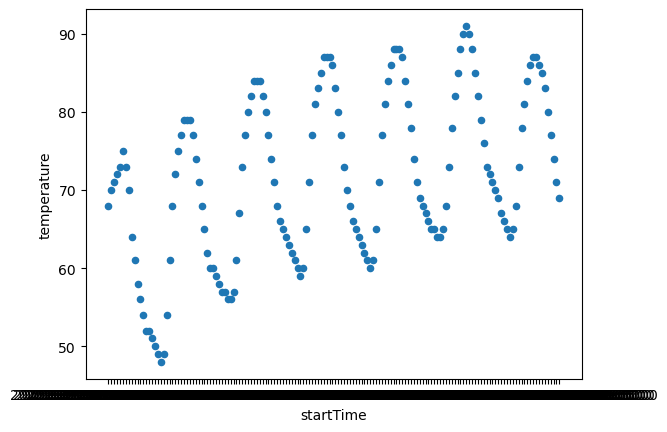

In [21]:
df.plot.scatter(x="startTime", y="temperature")

### Refine Your Scatter Plot

Above, you have a scatter plot -- but the x-axis is likely unreadable and the plot is hard to read.  Data visualizations in Python can take additional function parameters, by listing them inside of the `df.plot.scatter(...)` command similar to how the `x` and `y` parameters are already listed.

Additionally, we'll save this visualization in a variable called `ax` so we can verify it looks good!

In the cell below, add the following additional parameters to the `df.plot.scatter` function, making sure to separate each one by commas:
- Add your original `x` and `y` parameters that you used in the graph you just made to the code below, and then:
- Add `title="Hourly Temperature Forecast for LOCATION"`, replacing `LOCATION` with the city/location you choose to find the forecast of in this MicroProject,
- Add `xticks = df.startTime.values[::6]` to show only every 6th tick to get fewer x-axis labels,
- Add `rot = 90` to rotate the labels 90 degrees (vertical),
- Add `grid = True` to add gridlines,
- Add `figsize = (10, 6)` to make the figure 10 inches wide and 6 inches tall, making it larger *(you can change these values to make it bigger/smaller as you want and they do not need to be exactly 10 and 6)*,
- Add all of these options, **and any others you want**, to get a really useful visualization! :)

<Axes: title={'center': 'Hourly Temperature Forecast for Urbana, IL'}, xlabel='startTime', ylabel='temperature'>

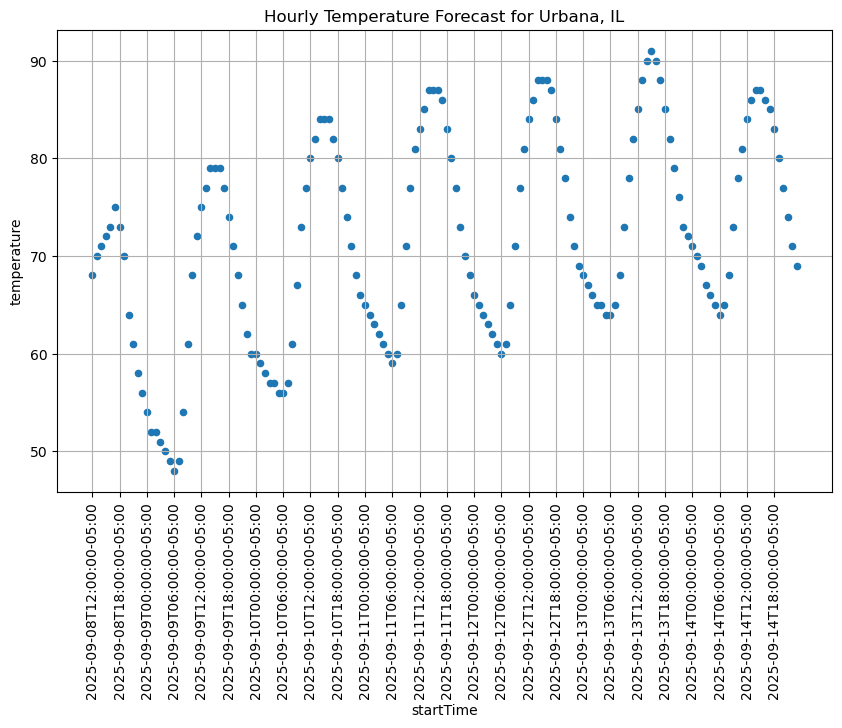

In [23]:
# Add all the parameters to `df.plot.scatter` to make a great looking scatter plot:
ax = df.plot.scatter(x="startTime", y="temperature", title = "Hourly Temperature Forecast for Urbana, IL", xticks = df.startTime.values[::6], rot=90, grid=True, figsize = (10,6) )
ax

In [24]:
### TEST CASE for Part 4: Create a Scatter Plot
tada = "\N{PARTY POPPER}"
import matplotlib.pyplot as plt

assert( "ax" in vars() ), \
  "You must store your data visualization in a Python variable called `ax`."

assert( ax.axes.get_xticklabels()[0].get_text() in df.startTime.values ), \
  "Your x-axis values must be the starting times of each hour of the weather forecast."

ytick = float(ax.axes.get_yticklabels()[0].get_text().replace("−", "-"))
assert( ytick > -200 ), \
  "Your y-axis values must be the temperature for each hour of the weather forecast."
assert( ytick < 200 ), \
  "Your y-axis values must be the temperature for each hour of the weather forecast."

assert( len(ax.title.get_text()) > 10 ), \
  "Your data visualization must contain a title."

assert( not "LOCATION" in ax.title.get_text() ), \
  "In the title, you must replace LOCATION with an actual location."

print(f"{tada} All Tests Passed! {tada}")

🎉 All Tests Passed! 🎉


<hr style="color: #DD3403;">

## Share Your Weather Forecast Visualization!

The visualization you made is **unique to your location** and **unique the time you completed this MicroProject** -- for every location, and for every hour, it will look a little different!

It would be an honor to me if you shared the image you created in the DISCOVERY Discord in the channel `#02-hourly-weather-forecast`, and check out the forecasts for other times and locations that others have shared. :)

Hope to see your image in Discord! 🧡💙

<hr style="color: #DD3403;">

## Submission

You're almost done!  All you need to do is to commit your lab to GitHub and run the GitHub Actions Grader:

1.  ⚠️ **Make certain to save your work.** ⚠️ To do this, go to **File => Save All**

2.  After you have saved, exit this notebook and return to https://discovery.cs.illinois.edu/microproject/dataframe-nws-weather-forecast/ and complete the section **"Commit and Grade Your Notebook"**.

3. If you see a 100% grade result on your GitHub Action, you've completed this MicroProject! 🎉